<img src="https://s3.amazonaws.com/edu-static.mongodb.com/lessons/M220/notebook_assets/screen_align.png" style="margin: 0 auto;">


# Problem Statment

Employees are the most important part of an organization.Successful employees meet deadlines, make sales
and build the brand through positive customer interaction

Employee attrition is a major cost to an organization and predicting such attrition is the important
requirment of the Human Resources department in many organizations. In this problem main task is to predict the
attrition rate of employees of an  Organization

# Objectives

* This project aims at finding the attributes responsible for employee attition with the data mining technique. 
* Study factors responsible for deciding the valuable employees


# Workaround

**IBM HR Analytics: (IBM Inc., 2017).**


IBM Software has one of its products in Talent Management software category called IBM Kenexa HR analytics, powered by IBM Watson Analytics. One of the solutions provided by IBM workforce analytics is `Prediction of employee attrition rate`. It analyses the key drivers for attrition and then the employee attrition is predicted

**SAP Workforce analytics: (SAP Inc., 2017)**

SAP SuccessFactors is using predictive analytics to help answer questions related to understanding turnover and identifying and managing flight risk.

Thus, IBM and SAP have found a solution and developed their own application to predict the employee attrition rate, so that company can found a replacement of an employee beforehand.

# Assumptions

1. The first assumption was theoretical and made while choosing the attributes for deciding on the valuable employee. The assumption was made based on the study about past researches and case studies mentioned in Literature So I had choose following attributes *Employee Performance, Peer-Manager Relationship, Number of years at current company, Education level, Job Level, Job Involvement, Job Title, Job Satisfaction*

2. Similarly based on past research and case studies, I had considered following attributes as effective retention factors  *Promotion, Percent Salary Hike, Work Life balance, Work environment, Job satisfaction, Job involvement, Peer relationship*



In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
import seaborn as sns
import os
import joblib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "employee analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def load_data(filename,PROJECT_ROOT_DIR=PROJECT_ROOT_DIR):
    path=os.path.join(PROJECT_ROOT_DIR,filename)
    return pd.read_csv(filename)

# Data Preperation

In [3]:
data=load_data("employee.csv")
df=pd.DataFrame(data)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df=df.drop(["StandardHours","Over18","EmployeeCount"],axis=1)

In [6]:
for i in df.columns:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [7]:
categorical_variable=[]
numerical_variables=[]
for i in df.columns:
    if(df[i].dtypes==np.int64 or df[i].dtypes==np.float64):
        numerical_variables.append(i)
    else:
        categorical_variable.append(i)

# Data Visualization

<Figure size 2160x1440 with 0 Axes>

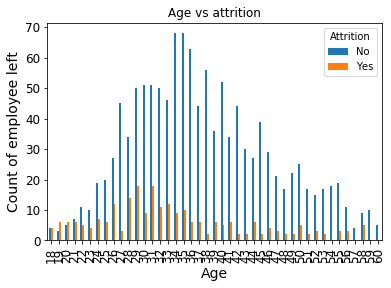

In [10]:

plt.figure(figsize=(30,20))

pd.crosstab(data.Age,data.Attrition).plot(kind='bar')
plt.title("Age vs attrition")

plt.ylabel("Count of employee left")
plt.xlabel("Age")
plt.show()

From above graph we come to know that from age 28 to 37 attrition rate is high


<Figure size 2160x1440 with 0 Axes>

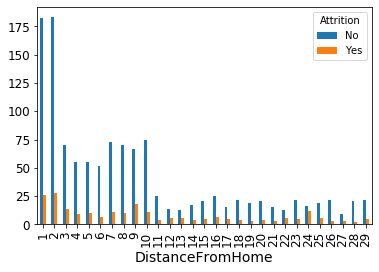

<Figure size 2160x1440 with 0 Axes>

In [34]:
pd.crosstab(data.DistanceFromHome,data.Attrition).plot(kind='bar')
plt.figure(figsize=(30,20))

From above graph we come to know that when distancce is less the attrition rate is more

<Figure size 2160x1440 with 0 Axes>

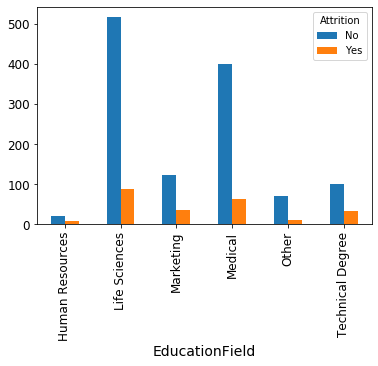

<Figure size 2160x1440 with 0 Axes>

In [36]:
pd.crosstab(data.EducationField,data.Attrition).plot(kind='bar')
plt.figure(figsize=(30,20))

So from above graph we conclude that The field with
Life Science and medical has more attrition.But the employee
Having Human Resources having less attrition 


<Figure size 2160x1440 with 0 Axes>

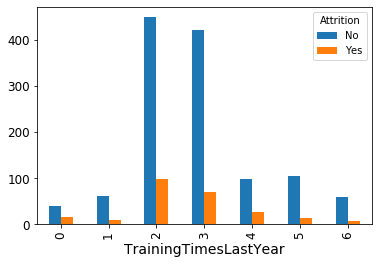

<Figure size 2160x1440 with 0 Axes>

In [38]:
pd.crosstab(data.TrainingTimesLastYear,data.Attrition).plot(kind='bar')
plt.figure(figsize=(30,20))

When training to the employee is not being done More three years
then employee attrition rate is affected

<Figure size 2160x1440 with 0 Axes>

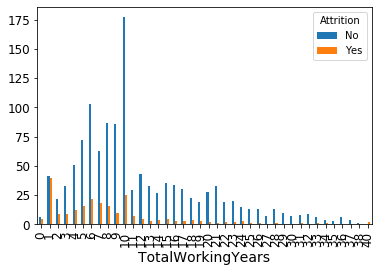

<Figure size 2160x1440 with 0 Axes>

In [40]:
pd.crosstab(data.TotalWorkingYears,data.Attrition).plot(kind='bar')
plt.figure(figsize=(30,20))

When employee is working between 2-6 years has more chances of
employee turnover but when empoyee has total working years of 40 years
then the attrition rate is negligible

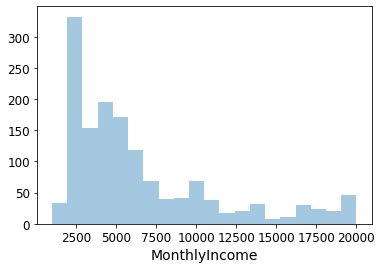

In [46]:
sns.distplot(df.MonthlyIncome, kde=False);

From above graph we can conclude that the bignners salary would be 
from 2500 to 7500 And employee with maximum experience would have salary of 20000

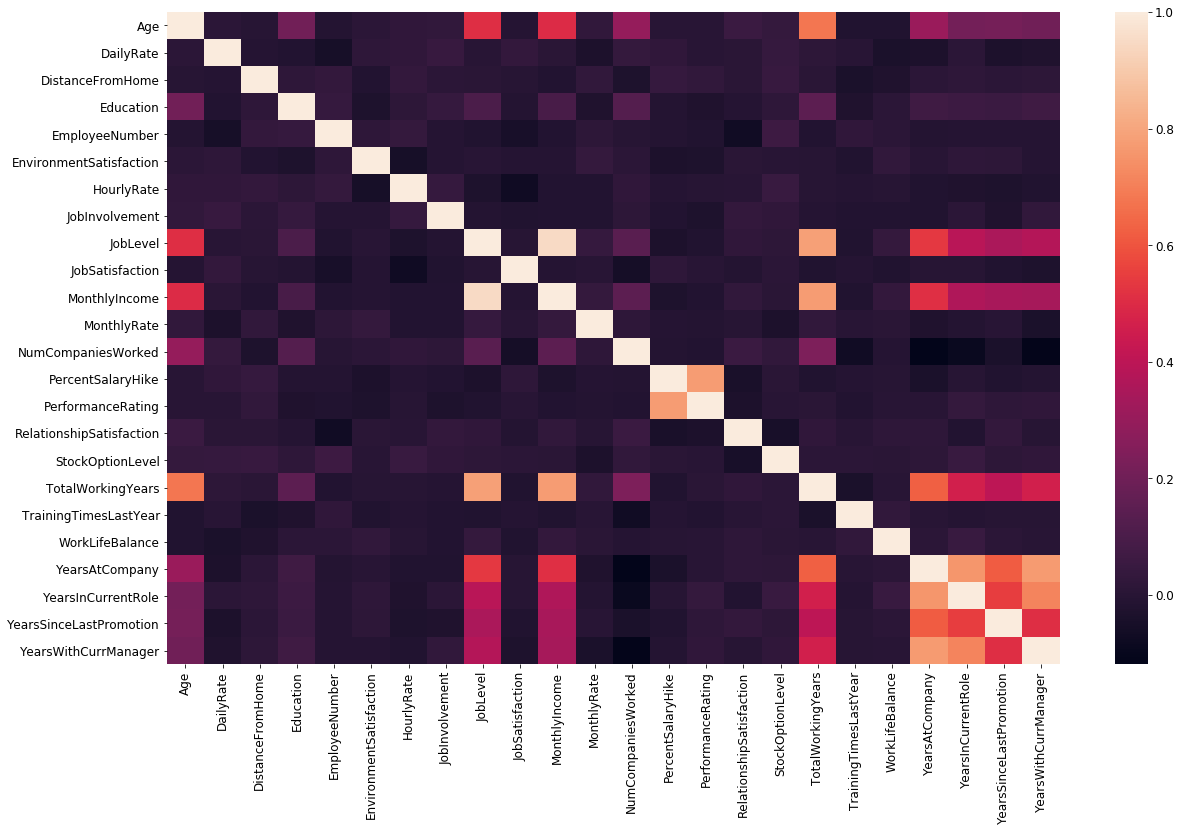

In [48]:
corr=df.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

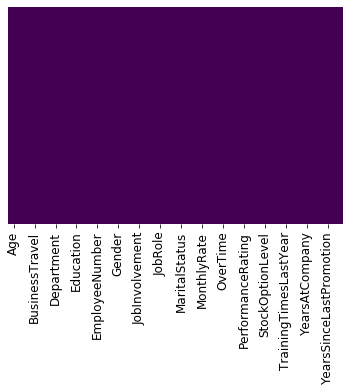

In [49]:
missing_values=df.isna()
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

From here we can conclude that there is no missing
values but if there will be yellow marking then there is missing
values

In [27]:
encoder=LabelEncoder()
for i in categorical_variable:
    df[i]=encoder.fit_transform(df[i])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


# Data Preprocessing

In [29]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [30]:
test = SelectKBest(score_func=chi2, k=16)##we will get 16 columns automatically selected
fit = test.fit(x, y)
# summarize scores
np.set_printoptions(precision=3)##upto 3 decimal accuracy not compulsary
print(fit.scores_)
features = fit.transform(x)##coverts to matrix
# summarize selected features
print(features)
df1=pd.DataFrame(features)
df1


[8.416e+01 2.203e-06 9.566e+02 1.329e+00 6.377e+01 5.206e-01 8.349e-01
 5.812e+01 6.891e+00 5.101e-01 4.318e-01 4.606e+00 2.494e+01 9.004e+00
 7.012e+00 1.875e+01 1.279e+05 1.197e+03 6.439e+00 6.385e+01 2.350e-01
 5.061e-04 1.332e+00 2.527e+01 2.307e+02 3.086e+00 1.086e+00 1.421e+02
 1.175e+02 7.602e+00 1.107e+02]
[[  41 1102    1 ...    4    0    5]
 [  49  279    8 ...    7    1    7]
 [  37 1373    2 ...    0    0    0]
 ...
 [  27  155    4 ...    2    0    3]
 [  49 1023    2 ...    6    0    8]
 [  34  628    8 ...    3    1    2]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,41,1102,1,1,2,7,2,5993,19479,1,0,8,6,4,0,5
1,49,279,8,2,2,6,1,5130,24907,0,1,10,10,7,1,7
2,37,1373,2,4,1,2,2,2090,2396,1,0,7,0,0,0,0
3,33,1392,3,5,1,6,1,2909,23159,1,0,8,8,7,3,0
4,27,591,2,7,1,2,1,3468,16632,0,1,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,2,2,1,2571,12290,0,1,17,5,2,0,3
1466,39,613,6,2062,3,0,1,9991,21457,0,1,9,7,7,1,7
1467,27,155,4,2064,2,4,1,6142,5174,1,1,6,6,2,0,3
1468,49,1023,2,2065,2,7,1,5390,13243,0,0,17,9,6,0,8


From above 32 columns we now selected 16 most important columns and they are
YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole,YearsAtCompany
TotalWorkingYears,	StockOptionLevel	,MonthlyRate,MonthlyIncome,DailyRate,Age,
DistanceFromHome,EmployeeNumber,EducationalField

In [36]:
numerical_pipeline=Pipeline([ ("Feature_selection",SelectKBest(score_func=chi2, k=16)),
                            ("Scaler",StandardScaler())
                            ])
numerical_pipeline.fit(x,y)
df2=pd.DataFrame(numerical_pipeline.transform(x))
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.446350,0.742527,-1.010909,-1.701283,-0.057788,1.032716,1.236820,-0.108350,0.726020,1.591746,-0.932014,-0.421642,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.699621,-0.057788,0.626374,-0.133282,-0.291719,1.488876,-0.628241,0.241988,-0.164511,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-1.696298,-0.961486,-0.998992,1.236820,-0.937654,-1.674841,1.591746,-0.932014,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-1.694636,-0.961486,0.626374,-0.133282,-0.763634,1.243211,1.591746,-0.932014,-0.421642,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.691313,-0.961486,-0.998992,-0.133282,-0.644858,0.325900,-0.628241,0.241988,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,1.721670,-0.057788,-0.998992,-0.133282,-0.835451,-0.284329,-0.628241,0.241988,0.735447,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.469754,-0.393938,1.723332,0.845911,-1.811675,-0.133282,0.741140,1.004010,-0.628241,0.241988,-0.293077,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-1.605183,-0.640727,1.726655,-0.057788,-0.186309,-0.133282,-0.076690,-1.284418,1.591746,0.241988,-0.678774,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0.546677,-0.887515,1.728317,-0.057788,1.032716,-0.133282,-0.236474,-0.150393,-0.628241,-0.932014,0.735447,0.325228,0.488900,-0.679146,1.086895


# Short Promising models


In [37]:
x=df2
y=df["Attrition"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

From above analysis we come to single conclusion that the give problem
Statment is of categorical type that is of classification type. So we will use
classification models to solve above problem statment


In [39]:
log_clf = LogisticRegression(C=89,random_state=0)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=0,max_features=6)
svm_clf = SVC(gamma="auto", random_state=0)
knn_clf=KNeighborsClassifier(metric="euclidean",n_neighbors=7)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),("svm",svm_clf)],
    voting='hard')

In [40]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=89, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                 

From above exprimentation we come to know that random forest would perform best with specific
conditions.So now I will go with Random forest classifier 

# Fine Tuning System

In [41]:
param_grid=[{'n_estimators':[100,200,300],'max_features':[6,8,12,14]}]
grid_search=GridSearchCV(rnd_clf,param_grid,cv=5)
grid_search.fit(x,y)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 200}

So before hyperparameter tunning accuracy of random forest was 86.63 but after applying
hyperparameters acuracy inncreased by .20

In [46]:
rnd_clf.fit(x_train,y_train)
y_pred=rnd_clf.predict(x_test)
score=accuracy_score(y_test,y_pred)


0.8684807256235828


# Result analysis

Saving figure confusion-matrix


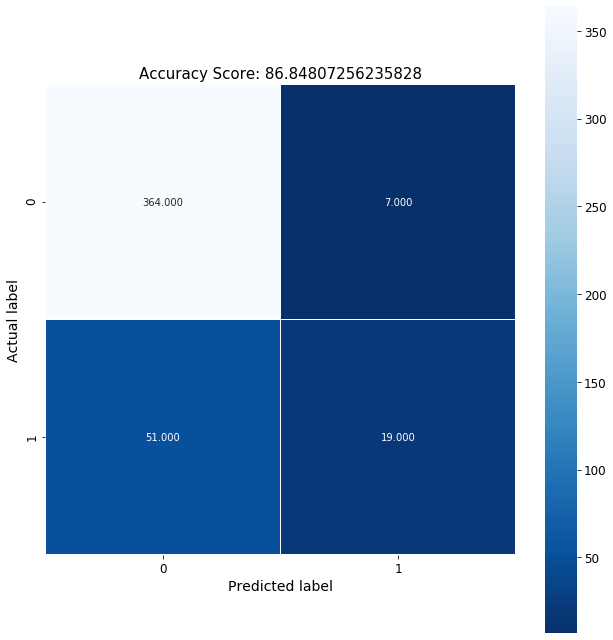

In [118]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score*100)
plt.title(all_sample_title, size = 15);
save_fig("confusion-matrix")

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       371
           1       0.73      0.27      0.40        70

    accuracy                           0.87       441
   macro avg       0.80      0.63      0.66       441
weighted avg       0.85      0.87      0.84       441



AUC: 0.733


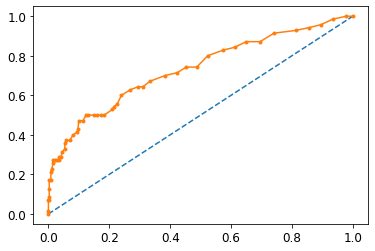

Saving figure roc curve


<Figure size 432x288 with 0 Axes>

In [122]:
probs = rnd_clf.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
save_fig("roc curve")

f1=0.396 auc=0.733 ap=0.477


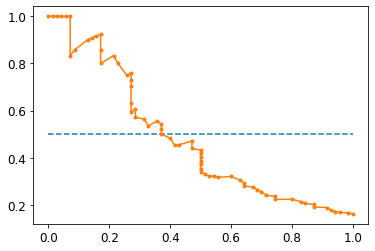

Saving figure precision recall curve


<Figure size 432x288 with 0 Axes>

In [124]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, y_pred)
# calculate precision-recall AUC
#auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
%matplotlib inline
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot

plt.show()
save_fig("precision recall curve")

In [126]:

df1=pd.DataFrame(y_test)
df1['predicted']=y_pred
df1.to_csv("finalresult.csv")


In [57]:

filename = 'finalized_model.sav'
joblib.dump(rnd_clf, filename)
filename1="preprocess_pipeline.sav"
joblib.dump(numerical_pipeline,filename1)

['preprocess_pipeline.sav']

# Limitation

Limitation includes Limitation includes implementation of Prediction System for Employee Attrition due to less training
data set, implementation of Decision Making System for Retention due to complex development of the Classification Tree and Algorithm and inconsistent data, accuracy of Decision result, limited access to employee dataset due to GDPR

In [1]:
for i in df.columns:
    print(i)

NameError: name 'df' is not defined